# Pendahuluan

This final project would like to predict and classify webpages which are anticipated as phising.
Add background:
Add statistic how many cases includes phising:
Add statistic how many losses incurred due to web phising
Data is extracted from xxxx

In [1]:
#importing library
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, jarque_bera
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\user\Downloads\project\dataset for final project\webpagephishing.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [5]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

In [6]:
df.duplicated(subset=['url_length']).sum()

99587

In [7]:
duplicates=df.duplicated(subset=['url_length'])

In [8]:
df[duplicates].sort_values('url_length')

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
79104,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96847,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
95564,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
90751,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
20988,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87265,657,4,17,10,3,0,5,0,4,0,0,0,0,0,0,0,0,0,0,1
97813,714,6,10,8,3,0,14,0,13,0,0,0,0,0,0,0,0,9,0,1
96765,726,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1
71306,727,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1


In [9]:
balance=df['phishing'].value_counts().reset_index()

In [10]:
balance

,phishing,count
0,0,63715
1,1,36362


<Axes: xlabel='phishing', ylabel='count'>

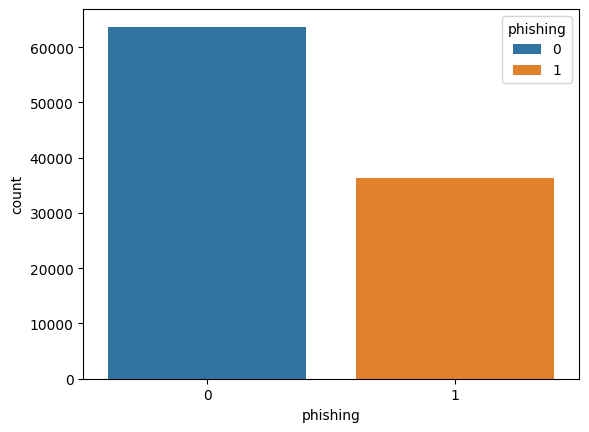

In [11]:
sns.barplot(data=balance,
            x=balance['phishing'],
            y=balance['count'],
            hue=balance['phishing'])

# DEAL WITH IMBALANCE

In [12]:
X=df.drop(['phishing', 'n_redirection'], axis=1)
y=df['phishing']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=12345)

oversample=RandomOverSampler()
#fit+transform
X_train_oversample, y_train_oversample=oversample.fit_resample(X_train,y_train)

<Axes: xlabel='phishing', ylabel='count'>

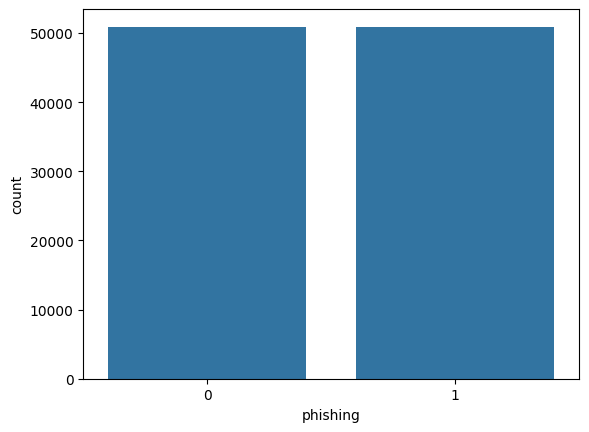

In [13]:
sns.countplot(x=y_train_oversample)

# EDA

In [52]:
df.shape

(100077, 20)

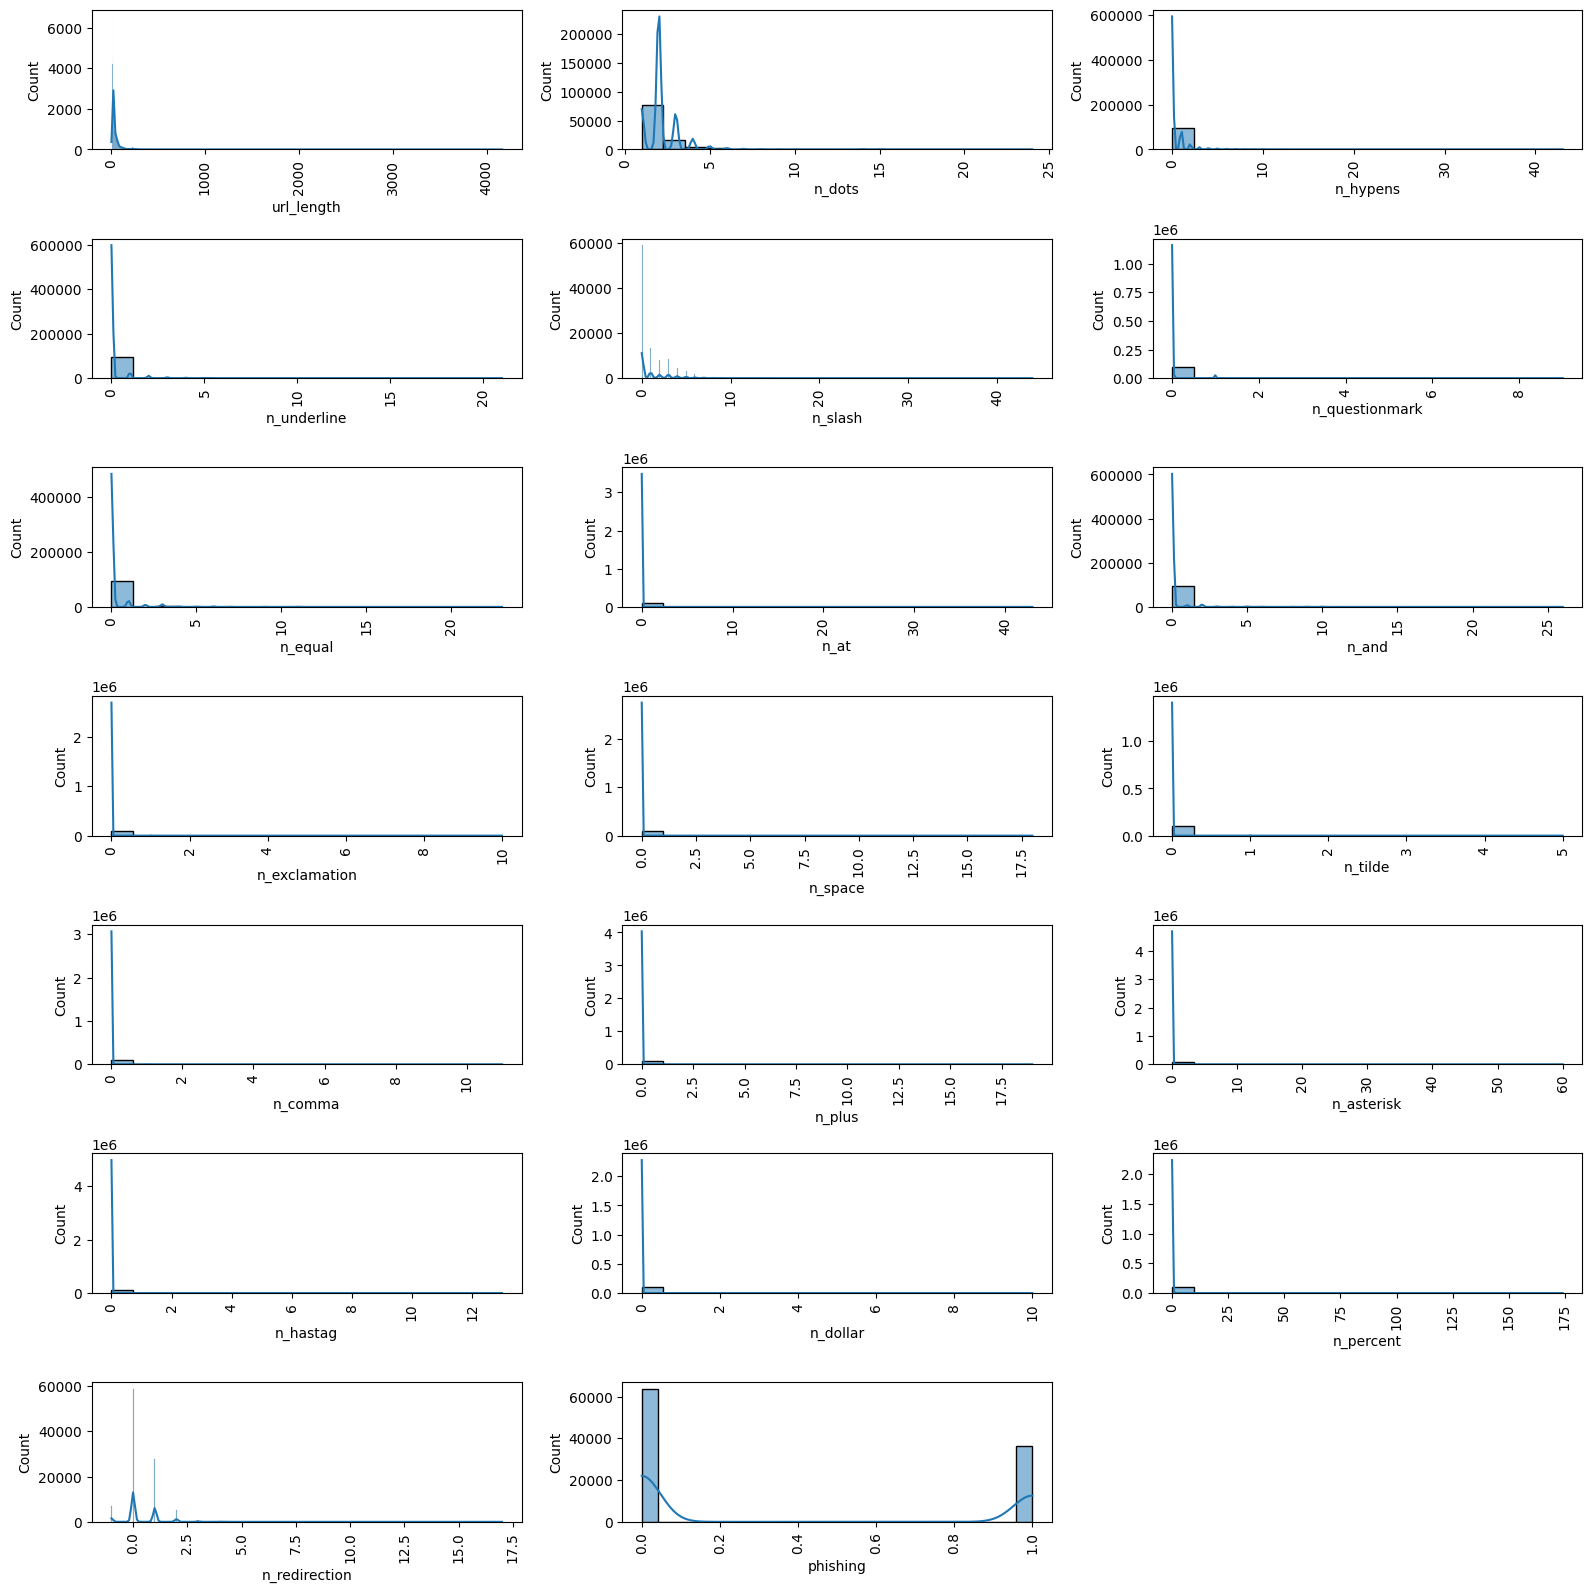

In [54]:
plt.figure(figsize=(16,16))
for index,column in enumerate(df):
    plt.subplot(7,3,index+1)
    sns.histplot(data=df,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

In [77]:
eda1=df.groupby('phishing').agg('mean').reset_index()

In [78]:
eda1

,phishing,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection
0,0,23.589971,2.051950,0.259123,0.045672,0.290732,0.003217,0.026980,0.000031,0.012760,0.000785,0.003265,0.000675,0.000785,0.001946,0.000000,0.000000,0.000000,0.075838,0.391305
1,1,66.491117,2.526566,0.661130,0.299021,2.615423,0.061493,0.546752,0.060888,0.372119,0.005803,0.007700,0.008773,0.005170,0.003383,0.011276,0.001238,0.005225,0.167895,0.309361


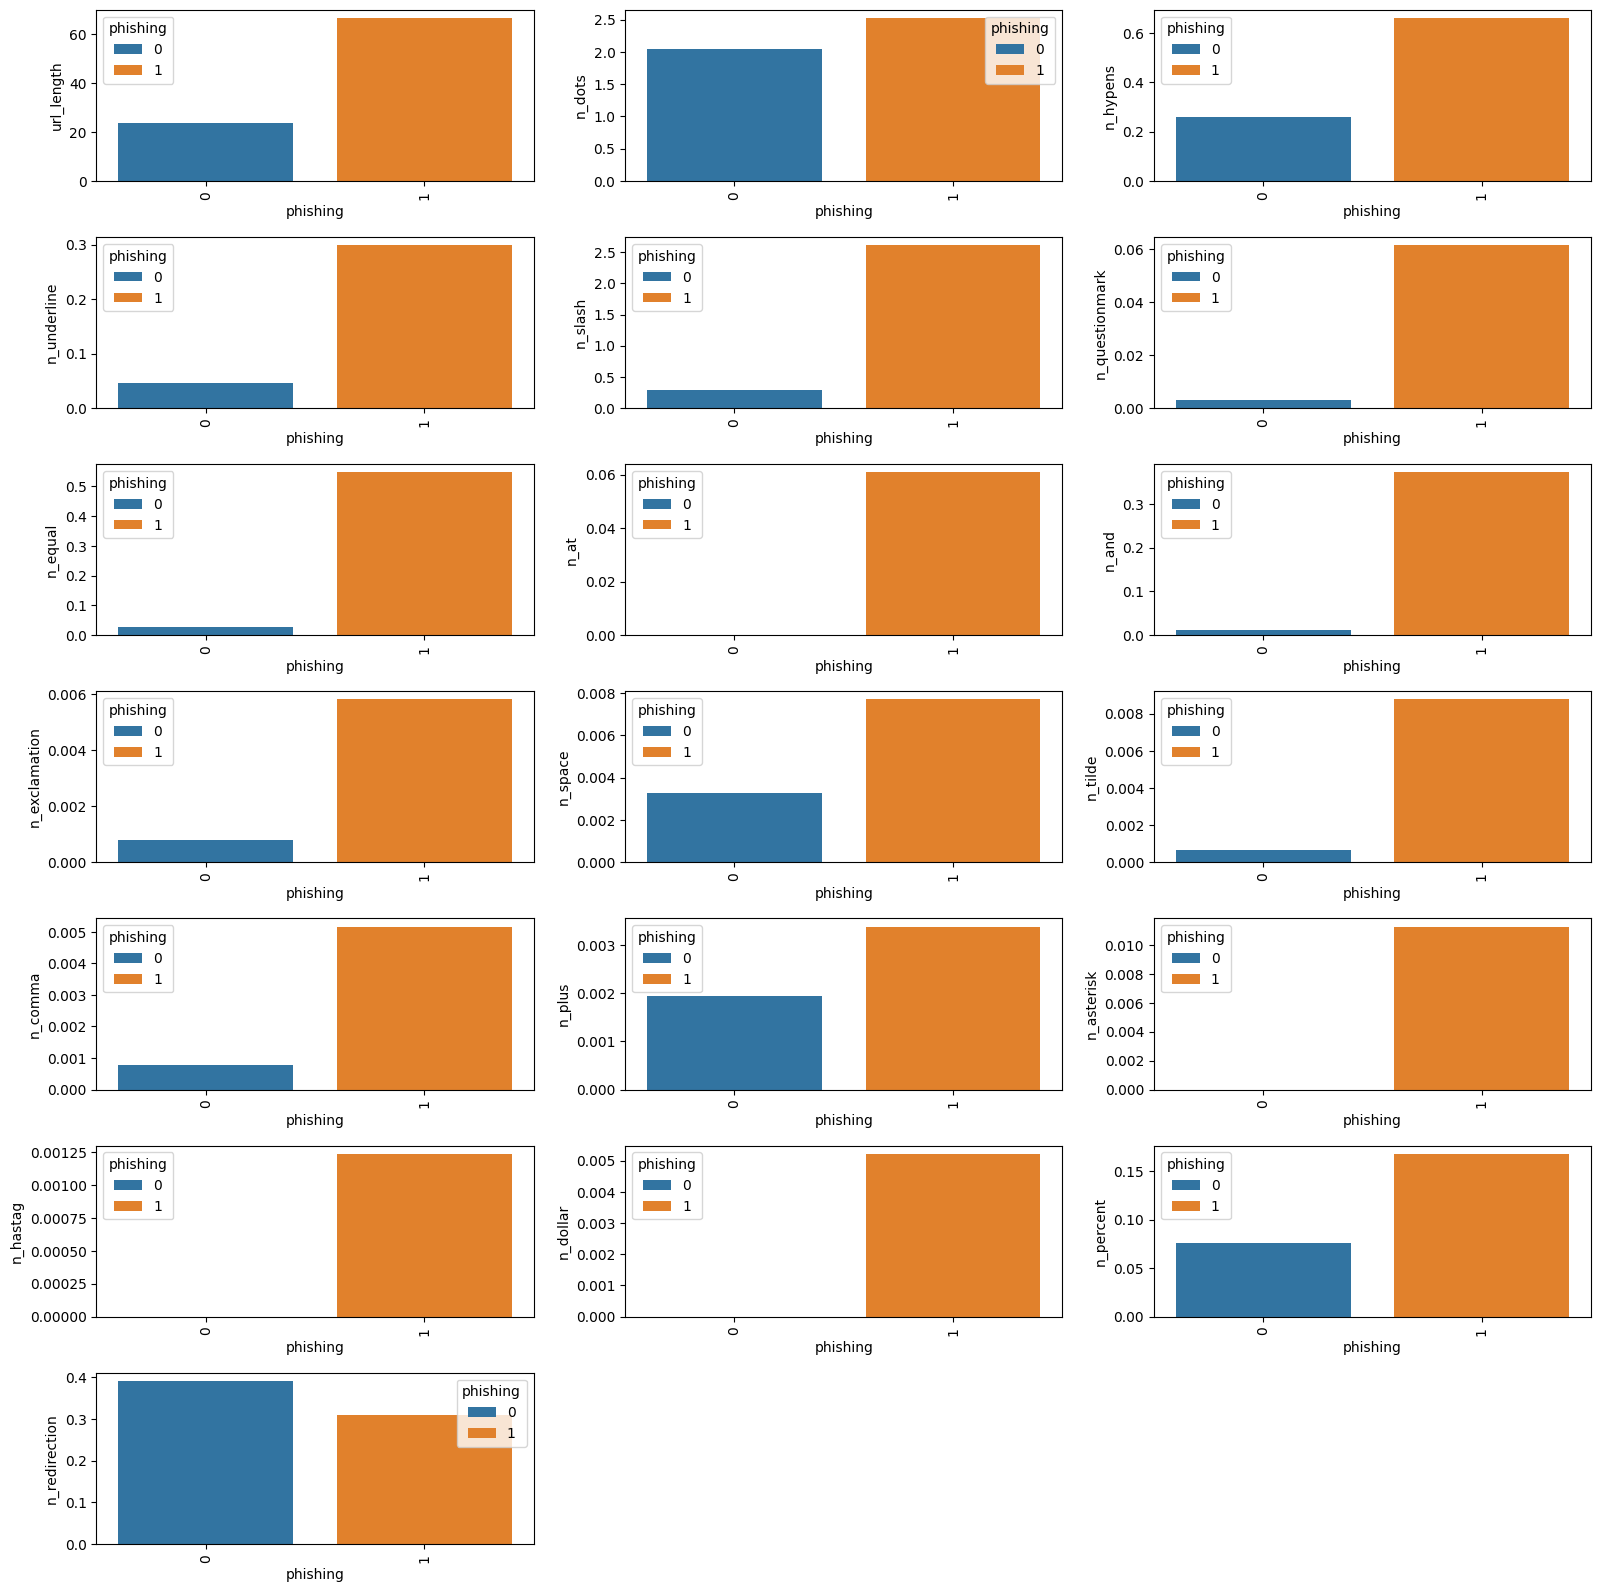

In [102]:
plt.figure(figsize=(16,16))
for index,column in enumerate(eda1.iloc[:,1:]):
    plt.subplot(7,3,index+1)
    sns.barplot(data=eda1,x=eda1['phishing'],y=eda1[column], hue=eda1['phishing'])
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

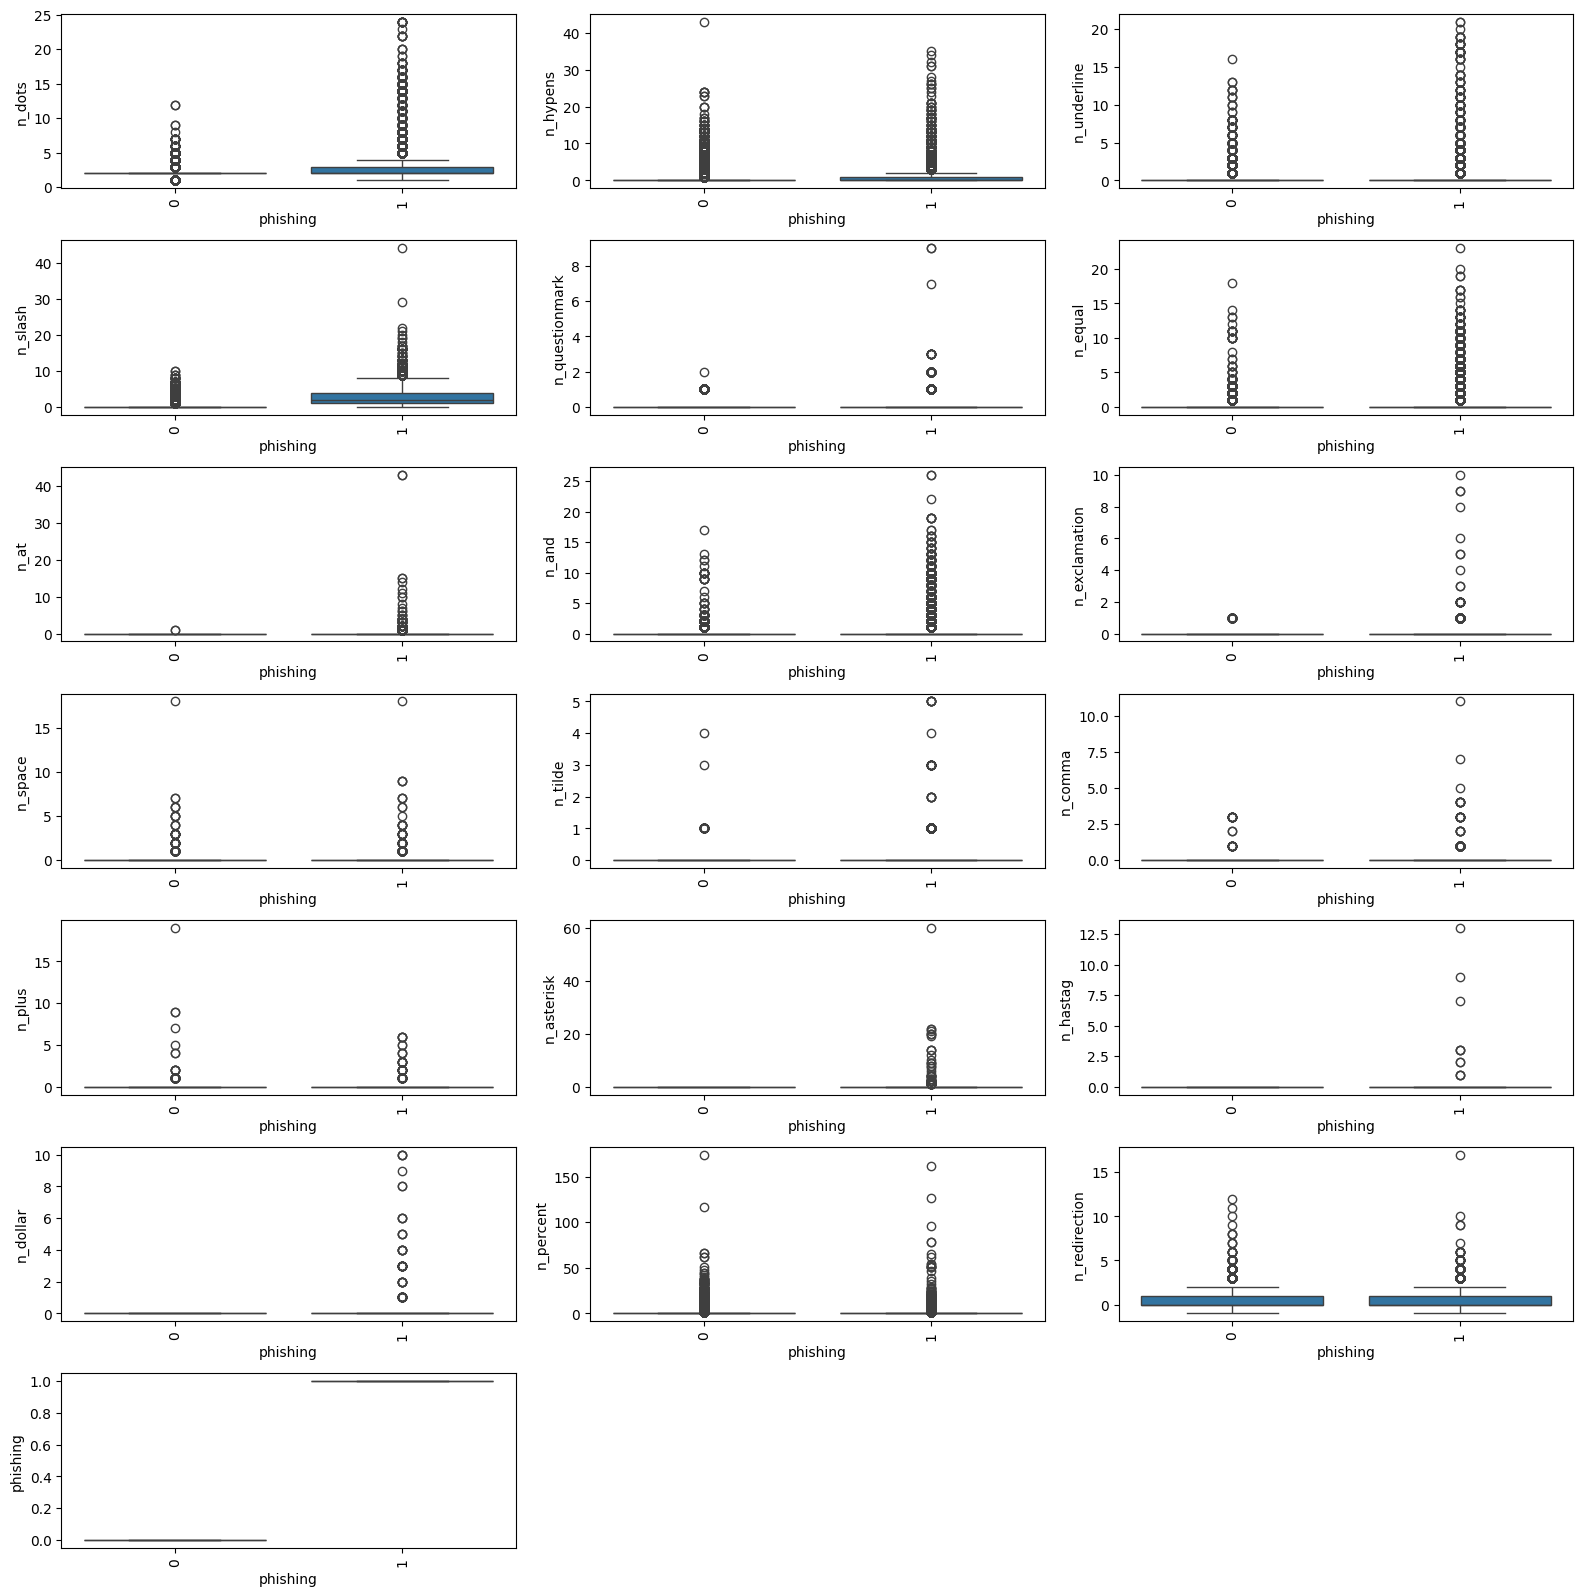

In [106]:
plt.figure(figsize=(16,16))
for index,column in enumerate(df.iloc[:,1:]):
    plt.subplot(7,3,index+1)
    sns.boxplot(data=df,x='phishing',y=column)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

# CORRELATION

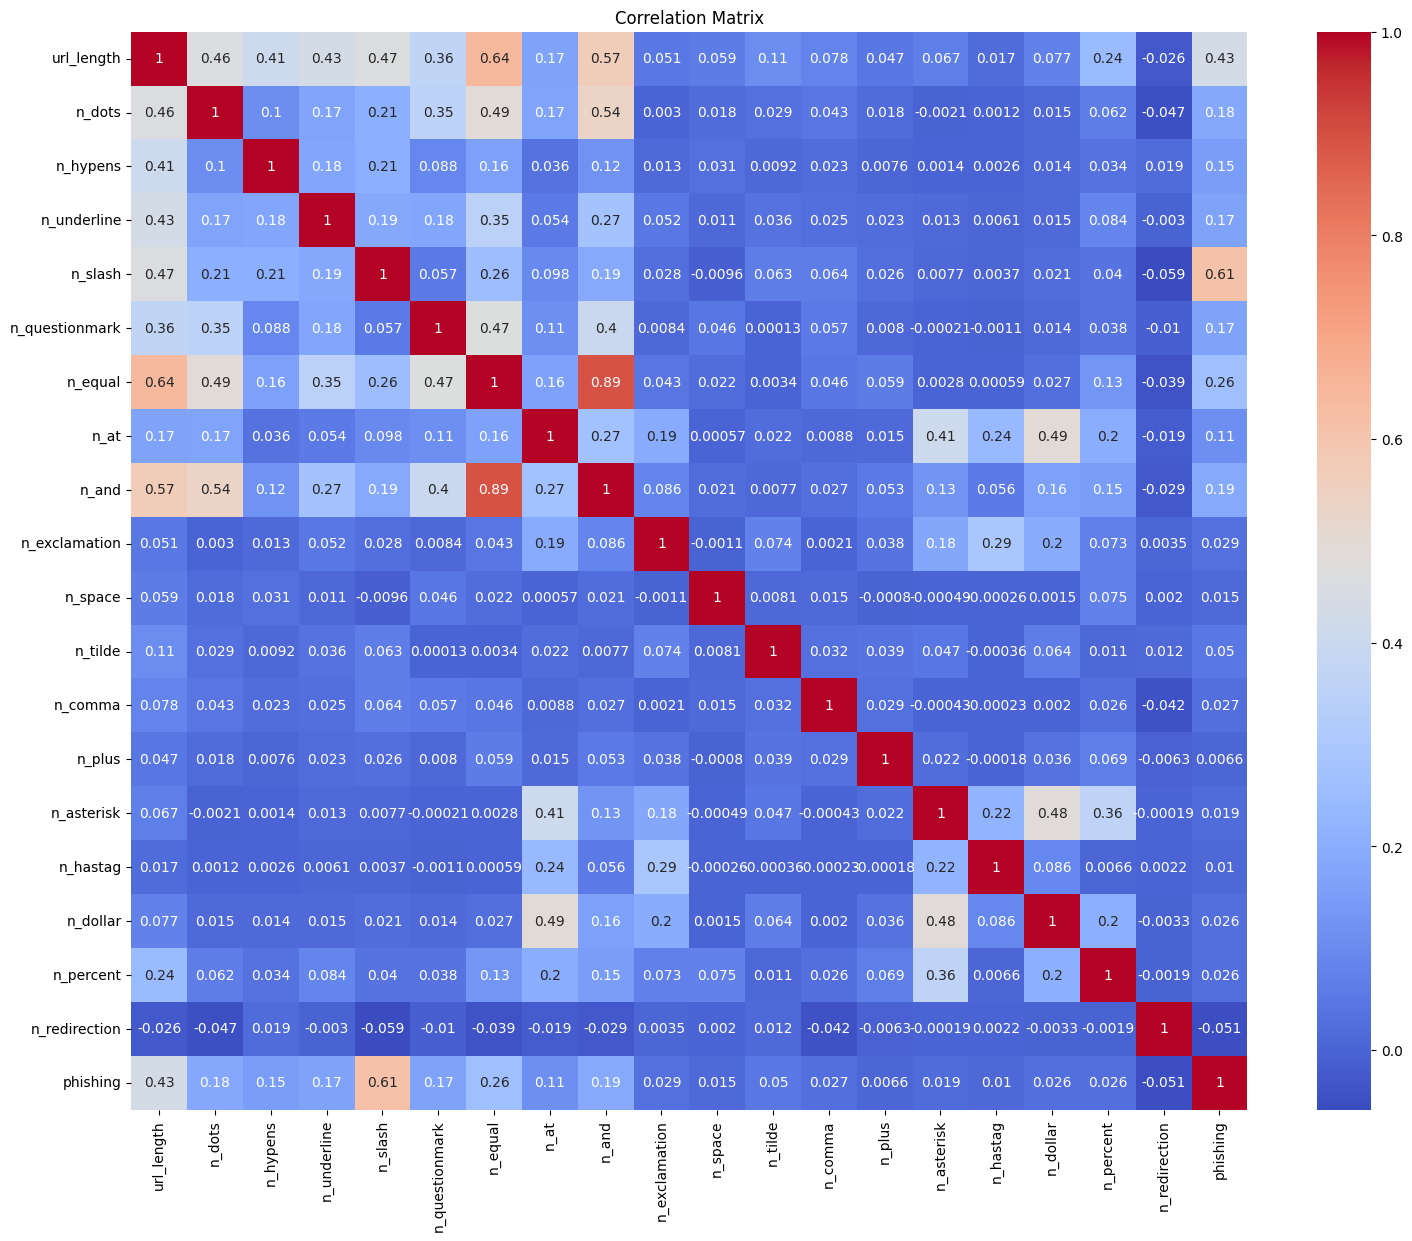

In [14]:
plt.figure(figsize=(18, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# MODELLING

In [15]:
X = df.drop(['phishing', 'n_redirection'], axis=1)
y = df['phishing']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [16]:
X_train_oversample, y_train_oversample

(        url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
 0               14       2         0            0        0               0   
 1               43       4         0            0        2               0   
 2               34       2         0            0        3               0   
 3               75       6         2            0        0               0   
 4               47       2         0            0        3               0   
 ...            ...     ...       ...          ...      ...             ...   
 101811          38       3         0            0        4               0   
 101812          33       2         2            0        0               0   
 101813          88       3         0            0       10               0   
 101814         640       5        11            2        3               0   
 101815          66       2         0            0        3               0   
 
         n_equal  n_at  n_and  n_exclamation  n_sp

In [17]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]

In [114]:
# Evaluate each model using cross-validation
best_model = None
best_accuracy = 0
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1_score: {f1:.2f}")
    print()

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Accuracy: {best_accuracy:.2f}")

Model: Logistic Regression
Accuracy: 0.86
Precision: 0.87
Recall: 0.72

Model: Decision Tree
Accuracy: 0.88
Precision: 0.86
Recall: 0.81

Model: Random Forest
Accuracy: 0.89
Precision: 0.86
Recall: 0.83

Model: Neural Network
Accuracy: 0.89
Precision: 0.83
Recall: 0.87

Best Model: RandomForestClassifier
Best Accuracy: 0.89


In [116]:
# Evaluate each model using cross-validation
best_model = None
best_accuracy = 0
for name, model in models:
    model.fit(X_train_oversample, y_train_oversample)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1_score: {f1:.2f}")
    print()

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Accuracy: {best_accuracy:.2f}")

Model: Logistic Regression
Accuracy: 0.86
Precision: 0.83
Recall: 0.78
f1_score: 0.81

Model: Decision Tree
Accuracy: 0.90
Precision: 0.84
Recall: 0.91
f1_score: 0.87

Model: Random Forest
Accuracy: 0.90
Precision: 0.84
Recall: 0.91
f1_score: 0.87

Model: Neural Network
Accuracy: 0.89
Precision: 0.81
Recall: 0.91
f1_score: 0.85

Best Model: RandomForestClassifier
Best Accuracy: 0.90


In [148]:
def logistic_regression_summary(model):
    coefficients = np.concatenate([model.intercept_, model.coef_.flatten()])
    report = {
        'coef': coefficients}
    return report

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
report = logistic_regression_summary(model)
feature_names = df.columns.tolist()[:-2]
report_df = pd.DataFrame(report, index=['intercept'] + feature_names) 
print(report_df)

                    coef
intercept      -2.819602
url_length      0.073656
n_dots         -0.444308
n_hypens       -0.595040
n_underline    -0.579516
n_slash         1.019522
n_questionmark  0.884281
n_equal         0.055580
n_at            3.849760
n_and          -0.565812
n_exclamation  -0.685532
n_space        -0.364208
n_tilde         0.424066
n_comma        -1.340217
n_plus         -0.662724
n_asterisk      1.472172
n_hastag        0.083309
n_dollar        0.447003
n_percent      -0.290532


# HYPERPARAMETER TUNING

####
best model

In [18]:
model = RandomForestClassifier()

param_grid = {'n_estimators': [100,200], 
               'max_depth': [None,5,10], 
               'criterion': ['gini', 'entropy']}

gs = GridSearchCV(
        estimator=model,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

best_model_imbalance = gs.fit(X_train, y_train)
best_model_balance = gs.fit(X_train_oversample, y_train_oversample)

print(best_model_imbalance.best_params_)
print(best_model_imbalance.best_score_)
print(best_model_balance.best_params_)
print(best_model_balance.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
0.9545817987311491


#### logistic regression

In [21]:
model = LogisticRegression()

param_grid = {'max_iter': [100,200],
              'multi_class': ['auto', 'ovr', 'multinomial'],
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

gs1 = GridSearchCV(
        estimator=model,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

logisticreg_imbalance = gs1.fit(X_train, y_train)
logisticreg_balance = gs1.fit(X_train_oversample, y_train_oversample)

print(logisticreg_imbalance.best_params_)
print(logisticreg_imbalance.best_score_)
print(logisticreg_balance.best_params_)
print(logisticreg_balance.best_score_)


{'max_iter': 100, 'multi_class': 'auto', 'solver': 'newton-cg'}
0.9344076506642841
{'max_iter': 100, 'multi_class': 'auto', 'solver': 'newton-cg'}
0.9344076506642841


####
Decision Tree

In [22]:
model = DecisionTreeClassifier()

param_grid = {'min_samples_leaf': [1,2,5,10], 
               'max_depth': [None,10,20,30], 
               'criterion': ['gini', 'entropy']}

gs2 = GridSearchCV(
        estimator=model,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

dtree_imbalance = gs2.fit(X_train, y_train)
dtree_balance = gs2.fit(X_train_oversample, y_train_oversample)

print(dtree_imbalance.best_params_)
print(dtree_imbalance.best_score_)
print(dtree_balance.best_params_)
print(dtree_balance.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10}
0.9568677997782709
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10}
0.9568677997782709


In [24]:
model = MLPClassifier()

param_grid = {'hidden_layer_sizes': [(10,10,10), (10,20,10)], 
               'activation': ['logistic','tanh','relu'], 
               'solver': ['adam','sgd']}

gs3 = GridSearchCV(
        estimator=model,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

neural_network_imbalance = gs3.fit(X_train, y_train)
neural_network_balance = gs3.fit(X_train_oversample, y_train_oversample)

print(neural_network_imbalance.best_params_)
print(neural_network_imbalance.best_score_)
print(neural_network_balance.best_params_)
print(neural_network_balance.best_score_)

{'activation': 'tanh', 'hidden_layer_sizes': (10, 20, 10), 'solver': 'adam'}
0.9555955306054698
{'activation': 'tanh', 'hidden_layer_sizes': (10, 20, 10), 'solver': 'adam'}
0.9555955306054698


# SAVE THE MODEL

In [25]:
import pickle
# Menyimpan model terbaik dengan pickle
pklname = ["best_model_imbalance.pkl",
           "best_model_balance.pkl",
           "logisticreg_imbalance.pkl",
           "logisticreg_balance.pkl",
           "dtree_imbalance.pkl",
           "dtree_balance.pkl",
           "neural_network_imbalance.pkl",
           "neural_network_balance.pkl"
           ]

modelname=[best_model_imbalance,
           best_model_balance,
           logisticreg_imbalance,
           logisticreg_balance,
           dtree_imbalance,
           dtree_balance,
           neural_network_imbalance,
           neural_network_balance
]


In [26]:
for i,v in zip(pklname, modelname):
    with open(i, 'wb') as file:  
        pickle.dump(v, file)

In [3]:
with open(pklname, 'rb') as file:  
    pick = pickle.load(file)

In [154]:
y_test_pred = pick.predict(X_test)
classificationrep = classification_report(y_test, y_test_pred)
print(classificationrep)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     12698
           1       0.83      0.86      0.85      7318

    accuracy                           0.89     20016
   macro avg       0.88      0.88      0.88     20016
weighted avg       0.89      0.89      0.89     20016



# PREDICTION

In [68]:
url = 'https://www.kaggle.com/code/jonbawues/web-phishing-classification-using-ensemble'
n_dots1 = url.count('.')

In [4]:
def predict(url):
    url_length = len(url)
    n_dots = url.count('.')
    n_hypens = url.count('-')
    n_underline = url.count('_')
    n_slash = url.count('/')
    n_questionmark = url.count('?')
    n_equal = url.count('=')
    n_at = url.count('@')
    n_and = url.count('&')
    n_exclamation = url.count('!')
    n_space = url.count(' ')
    n_tilde = url.count('~')
    n_comma = url.count(',')
    n_plus = url.count('+')
    n_asterisk = url.count('*')
    n_hashtag = url.count('#')
    n_dollar = url.count('$')
    n_percent = url.count('%')
    
    features = {
        'url_length': [url_length],
        'n_dots': [n_dots],
        'n_hypens': [n_hypens],
        'n_underline': [n_underline],
        'n_slash': [n_slash],
        'n_questionmark': [n_questionmark],
        'n_equal': [n_equal],
        'n_at': [n_at],
        'n_and': [n_and],
        'n_exclamation': [n_exclamation],
        'n_space': [n_space],
        'n_tilde': [n_tilde],
        'n_comma': [n_comma],
        'n_plus': [n_plus],
        'n_asterisk': [n_asterisk],
        'n_hastag': [n_hashtag],
        'n_dollar': [n_dollar],
        'n_percent': [n_percent]
    }
    
    input_df = pd.DataFrame(features)
    prediction = pick.predict(input_df)
    
    if prediction == 1:
        result = 'Phishing'
    else:
        result = 'Legitimate'
    return result

In [10]:
predict('http://www.online-tech-tips.com/computer-tips/how-to-change-mac-address/')

'Legitimate'

In [11]:
predict('http://appleid.apple.com-app.es/')

'Phishing'

In [12]:
predict('https://www.grab.com/id/')

'Phishing'

In [13]:
predict('https://www.google.com')

'Legitimate'